In [ ]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.ticker import FuncFormatter
import seaborn as sns

In [ ]:
dataset = pd.read_csv('NY-House-Dataset.csv')

In [ ]:
dataset.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


After looking at the dataset, we see that it has 17 columns in total. The first two columns have the broker's name and the kind of property, while the next 15 columns provide information about the New York housing market.

However, we only need type, price, bed, bath, property sqft and locality.

The data is not totally clean, to start.
"for sale" needs to be removed from the type column. The columns for locality and sublocality are inconsistent.

# **DATA CLEANING**

In [ ]:
dataset['FORMATTED_ADDRESS'].value_counts()
dataset.drop_duplicates(subset='FORMATTED_ADDRESS', inplace=True)

There were 16 duplicates in the formatted address column. We dropped those repeated values from the dataset.

In [ ]:
dataset.shape

(4550, 17)

We have 4,550 rows and 17 columns for analysis.

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4550 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4550 non-null   object 
 1   TYPE                         4550 non-null   object 
 2   PRICE                        4550 non-null   int64  
 3   BEDS                         4550 non-null   int64  
 4   BATH                         4550 non-null   float64
 5   PROPERTYSQFT                 4550 non-null   float64
 6   ADDRESS                      4550 non-null   object 
 7   STATE                        4550 non-null   object 
 8   MAIN_ADDRESS                 4550 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4550 non-null   object 
 10  LOCALITY                     4550 non-null   object 
 11  SUBLOCALITY                  4550 non-null   object 
 12  STREET_NAME                  4550 non-null   object 
 13  LONG_NAME         

There are 4550 non-null values in each column, indicating that there are no missing values.

However, we notice that the data type for the "BATH" and :PROPERTYSQFT" column is float (i.e., Decimal). To perform any analysis on these column, it is best if we convert it to a int data type.

In [ ]:
# converting the BATH column into int.
dataset['BATH']= dataset['BATH'].astype(int)
dataset['PROPERTYSQFT'] = dataset['PROPERTYSQFT'].apply(np.int64)

In [ ]:
# removing for sale from property types
dataset['TYPE'] = dataset['TYPE'].str.replace(' for sale', '', regex=False)
dataset['TYPE'].value_counts()

Co-op                1373
House                 964
Condo                 832
Multi-family home     696
Townhouse             284
Pending               229
Contingent             86
Land                   47
For sale               18
Foreclosure            14
Condop                  4
Coming Soon             2
Mobile house            1
Name: TYPE, dtype: int64

There is repetition of condo because of a spelling mistake, therefore we will fix that to avoid repetition during our analysis.

In [ ]:
dataset['TYPE'] = dataset['TYPE'].replace({'Condop':'Condo'})
dataset['TYPE'].value_counts()

Co-op                1373
House                 964
Condo                 836
Multi-family home     696
Townhouse             284
Pending               229
Contingent             86
Land                   47
For sale               18
Foreclosure            14
Coming Soon             2
Mobile house            1
Name: TYPE, dtype: int64

Amongst the different types of properties available in New York, Co-op has the highest demand. Individual houses and condos following closely behind.

In [ ]:
dataset['SUBLOCALITY'].value_counts()

New York            964
Kings County        693
Queens County       645
Queens              529
Richmond County     458
Brooklyn            442
Bronx County        290
New York County     263
The Bronx           172
Staten Island        56
Manhattan            21
Flushing              4
Coney Island          3
Riverdale             3
East Bronx            1
Brooklyn Heights      1
Jackson Heights       1
Rego Park             1
Fort Hamilton         1
Dumbo                 1
Snyder Avenue         1
Name: SUBLOCALITY, dtype: int64

We can see that New york itself has the highest number of properties, however, it also consists of all 5 boroughs within. With further analysis of the New York along with another variable, it would become clear which of the 5 boroughs are involved in it.

In [ ]:
dataset[dataset['SUBLOCALITY'] == 'New York']['STREET_NAME'].value_counts()

Manhattan          928
Kings County        14
Richmond County      9
New York County      5
Queens County        3
The Bronx            3
Bronx County         2
Name: STREET_NAME, dtype: int64

In [ ]:
# Create a mask for rows with 'New York' in the 'sub locality' column
mask = dataset['SUBLOCALITY'] == 'New York'

# Update 'sub locality' column based on conditions
dataset.loc[mask, 'SUBLOCALITY'] = dataset.loc[mask, 'STREET_NAME'].apply(
    lambda x: x.split(' - ')[0] if ' - ' in x else x
)
# Drop the 'street' column if needed
# df.drop('street', axis=1, inplace=True)
dataset['SUBLOCALITY'].value_counts()

Manhattan           949
Kings County        707
Queens County       648
Queens              529
Richmond County     467
Brooklyn            442
Bronx County        292
New York County     268
The Bronx           175
Staten Island        56
Flushing              4
Coney Island          3
Riverdale             3
East Bronx            1
Brooklyn Heights      1
Jackson Heights       1
Rego Park             1
Fort Hamilton         1
Dumbo                 1
Snyder Avenue         1
Name: SUBLOCALITY, dtype: int64

In [ ]:
#cleaning the column by removing the repetitions.
sublocality_mapping = {
    'Kings County' : 'Brooklyn',
    'Queens County': 'Queens',
    'Richmond County': 'Staten Island',
    'New York County' : 'Manhattan',
    'Flushing' : 'Brooklyn',
    'Dumbo' : 'Brooklyn',
    'Bronx County' :'The Bronx',
    'Snyder Avenue' : 'Brooklyn',
    'Coney Island' : 'Brooklyn',
    'Riverdale' : 'The Bronx',
    'Brooklyn Heights' : 'Brooklyn',
    'Jackson Heights' : 'Queens',
    'Rego Park' : 'Queens',
    'Fort Hamilton' : 'Brooklyn',
    'East Bronx' : 'The Bronx'

}
dataset['Locality'] = dataset['SUBLOCALITY'].replace(sublocality_mapping)
dataset['Locality'].value_counts()

Manhattan        1217
Queens           1179
Brooklyn         1160
Staten Island     523
The Bronx         471
Name: Locality, dtype: int64

The New York city consists of 5 boroughs: Queens, Manhattan, Staten Island, Brooklyn and The Bronx.

After looking at the counts, it has been determined that properties for sale are highest in Manhattan, Queens and Brooklyn.



---



# **EDA & VISUALIZATION**

In [ ]:
# creating a new dataframe with the only the necessary columns
df = dataset[['TYPE', 'PRICE', 'BEDS', 'BATH', 'PROPERTYSQFT','Locality']]

In [ ]:
df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,PRICE,BEDS,BATH,PROPERTYSQFT
count,4550.00,4550.00,4550.00,4550.00
mean,2381524.80,3.37,2.35,2175.61
std,32196802.89,2.63,1.97,2287.80
min,2494.00,1.00,0.00,230.00
25%,499000.00,2.00,1.00,1200.00
50%,825000.00,3.00,2.00,2184.00
75%,1495000.00,4.00,3.00,2184.00
max,2147483647.00,50.00,50.00,65535.00


The describe function helped us in understanding three important things
1. The maximum number of bedrooms in a house is 50
2. The maximum number of bathrooms in a house is 50
3. There are house types with 0 bathrooms.
4. The minimum price for a property is 2,494 dollars and the highest price for a property is around 2 billion dollars.

Its better to explore these variables.

In [ ]:
df[df['BEDS']==50][['TYPE','BATH','PRICE']]

,TYPE,BATH,PRICE
1143,Multi-family home,50,11000000


In [ ]:
df[df['BATH']==0][['TYPE','PRICE','Locality']]

,TYPE,PRICE,Locality
2699,Pending,675000,Manhattan
3379,Townhouse,14995000,Manhattan


In [ ]:
#summary_stats = df['PRICE'].describe()
#summary_stats = summary_stats.apply(lambda x: format(x, '.2f'))
#sns.boxplot(x=summary_stats)

In [ ]:
df[df['PRICE']==2147483647]

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,Locality
304,House,2147483647,7,6,10000,Staten Island


In [ ]:
df[df['PRICE'] == 2494]

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,Locality
317,For sale,2494,2,1,2184,Manhattan


In [ ]:
df[df['PRICE'] > 100000000][['TYPE','PRICE','Locality']]

,TYPE,PRICE,Locality
1,Condo,195000000,Manhattan
304,House,2147483647,Staten Island


We identified two properties with prices exceeding 100 million. Given their significantly higher values compared to the rest of the dataset, we have decided to exclude these outliers to ensure a more representative and accurate analysis of the general trends and patterns in the housing market.

In [ ]:
df[df['PRICE'] < 10000][['TYPE', 'PRICE', 'Locality']]

,TYPE,PRICE,Locality
310,For sale,3225,Manhattan
317,For sale,2494,Manhattan
360,Land,5800,Brooklyn


We have identified three properties with prices below $10,000, which fall well below the typical range observed in our dataset. Recognizing these instances as potential outliers, we believe excluding them from our analysis will contribute to a more focused and meaningful examination of the broader housing market trends.

In [ ]:
#creating df1 to filter out the outliers in the price column.
#this dataframe includes prices between $10000 and $100 million

df1 = df[(df['PRICE'] >= 10000) & (df['PRICE'] <= 100000000)].copy()

df1.head()

,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,Locality
0,Condo,315000,2,2,1400,Manhattan
2,House,260000,4,2,2015,Staten Island
3,Condo,69000,3,1,445,Manhattan
4,Townhouse,55000000,7,2,14175,Manhattan
5,House,690000,5,2,4004,Brooklyn


In [ ]:
df1.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,PRICE,BEDS,BATH,PROPERTYSQFT
count,4545.00,4545.00,4545.00,4545.00
mean,1868744.26,3.36,2.35,2170.50
std,4086206.89,2.63,1.97,2274.71
min,49500.00,1.00,0.00,230.00
25%,499000.00,2.00,1.00,1200.00
50%,825000.00,3.00,2.00,2184.00
75%,1495000.00,4.00,3.00,2184.00
max,65000000.00,50.00,50.00,65535.00


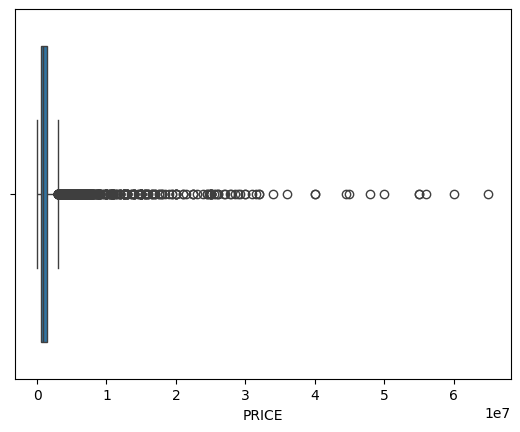

In [ ]:
#creating a box plot for the price column
sns.boxplot(x = 'PRICE' , data=df1)
plt.show()

Given the frequency of outliers in the price column, we approach the analysis in a novel way and in fewer steps. By breaking down the prices into smaller components, we hope to find important information that improves our knowledge of the complex dynamics present in our dataset.

<ipython-input-31-ac15c1535734>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'PRICE'] = df['PRICE'] / 1000


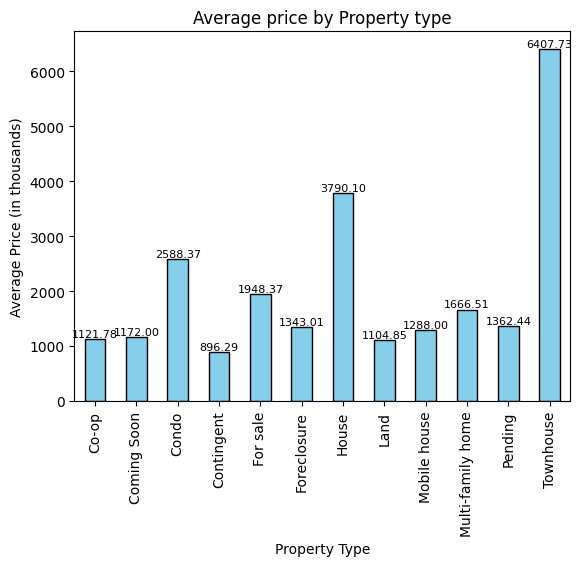

In [ ]:
#using df to avoid changing the price in df1.
#this shows us the average price of properties across various boroughs in New York city
df.loc[:, 'PRICE'] = df['PRICE'] / 1000
avg_price = df.groupby('TYPE')['PRICE'].mean()

ax = avg_price.plot(kind='bar', edgecolor='black', color='skyblue')

# Add data labels outside the bars
ax.bar_label(ax.containers[0], fmt='%.2f', label_type='edge', color='black', fontsize=8)

plt.title('Average price by Property type')
plt.xlabel('Property Type')
plt.ylabel('Average Price (in thousands)')
plt.show()

1. Townhouses have the highest average
price of $6407k, which indicates that there is a demand for upscale or premium housing options

2. Houses have the second highest average price of $3790k. This indicates that houses are also a popular choice among buyers but are more affordable than townhouses.

<ipython-input-25-13ec5d06b1d8>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Locality', data=df1, palette='winter')


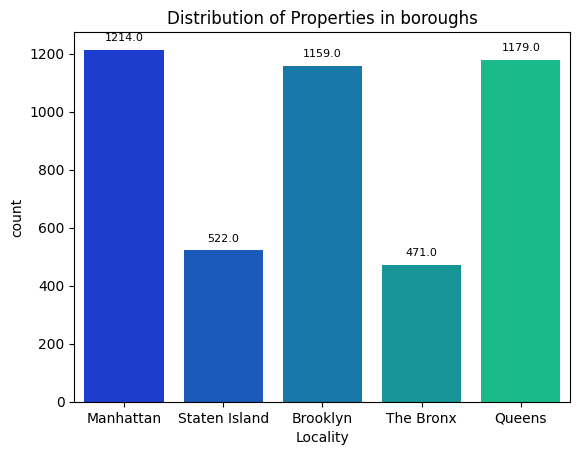

In [ ]:
#This graph shows us the number of properties available across the 5 boroughs in New York city
ax = sns.countplot(x='Locality', data=df1, palette='winter')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', xytext=(0, 5), textcoords='offset points', fontsize=8)
plt.title('Distribution of Properties in boroughs')
plt.show()

<ipython-input-26-31187a137ba8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TYPE', y='PRICE', data=df1, palette='Accent')


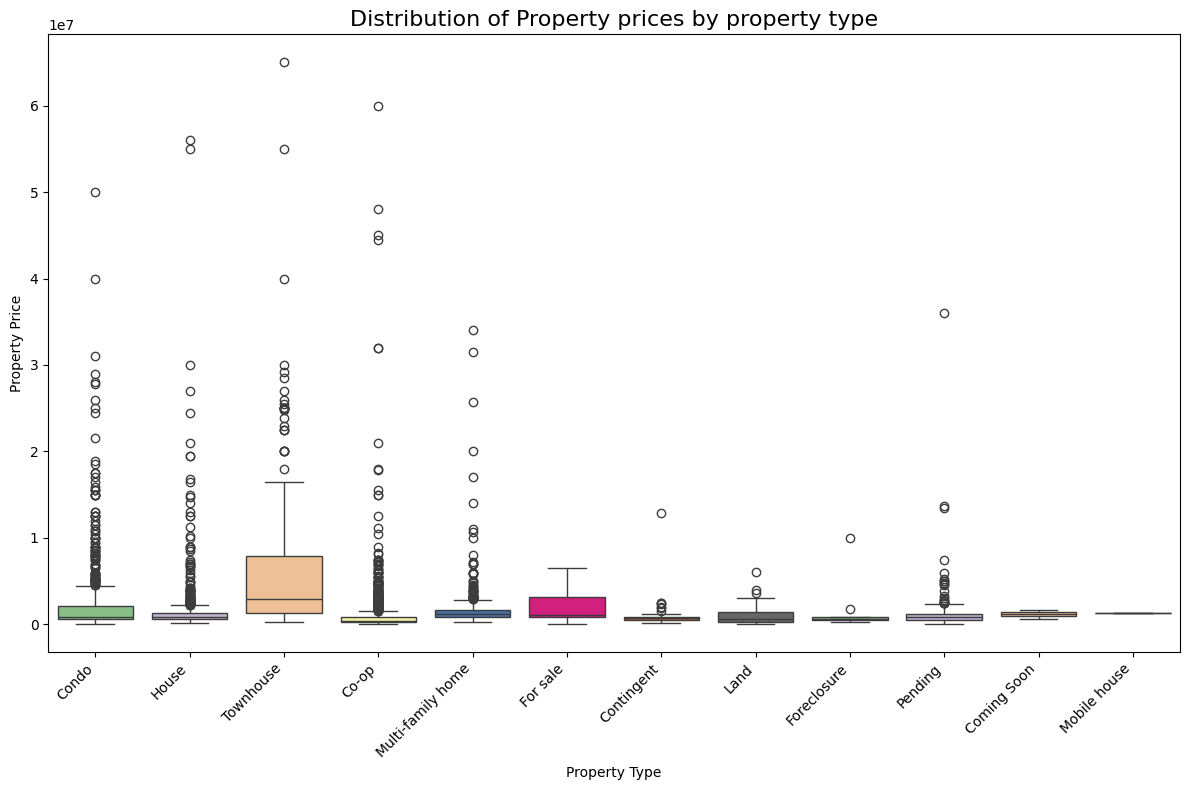

In [ ]:
#This boxplot identifies the price distribution of different property types.

plt.figure(figsize=(12,8))
sns.boxplot(x='TYPE', y='PRICE', data=df1, palette='Accent')
plt.title('Distribution of Property prices by property type', fontsize=16)
plt.xlabel('Property Type')
plt.ylabel('Property Price')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This plot indicates that property prices of townhouses tend to be higher and have more variation than other property prices.

<ipython-input-27-27c8642f36fa>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Locality', y='PRICE', data=df1, palette='Accent')


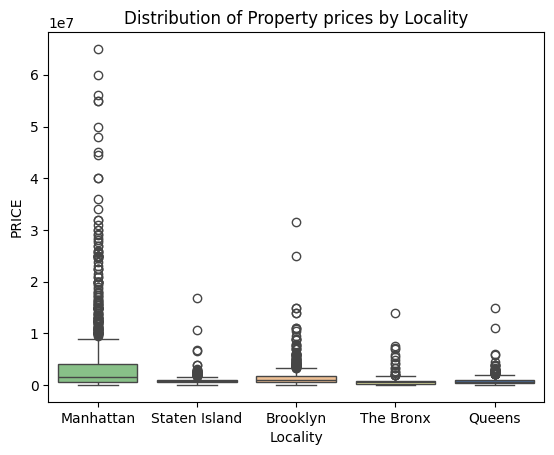

In [ ]:
sns.boxplot(x='Locality', y='PRICE', data=df1, palette='Accent')
plt.title('Distribution of Property prices by Locality')
plt.show()

This boxplot indicates the property prices but in different boroughs. As can be seen, the prices in Manhattan is higher and have more variation than other boroughs.

We could investigate the same question in more detail by breaking down the prices into smaller components of
1. more than $100 million

2. between 1 million and 10 million dollars

3. less than $1 million.


---



1. Price > 100000000

In [ ]:
df1[df1['PRICE'] > 10000000].groupby('Locality')['PRICE'].count()

Locality
Brooklyn          10
Manhattan        129
Queens             2
Staten Island      2
The Bronx          1
Name: PRICE, dtype: int64

We found a clear distribution in our locality-based research of property prices, especially when it came to properties costing more than $10 million. Manhattan stands out as the most popular area with 129 houses in this high-value level.

On the other hand, Brooklyn presents a more selective market, with ten houses in this restricted group. This variation draws attention to the distinct dynamics and market traits that each locality in our dataset exhibits.


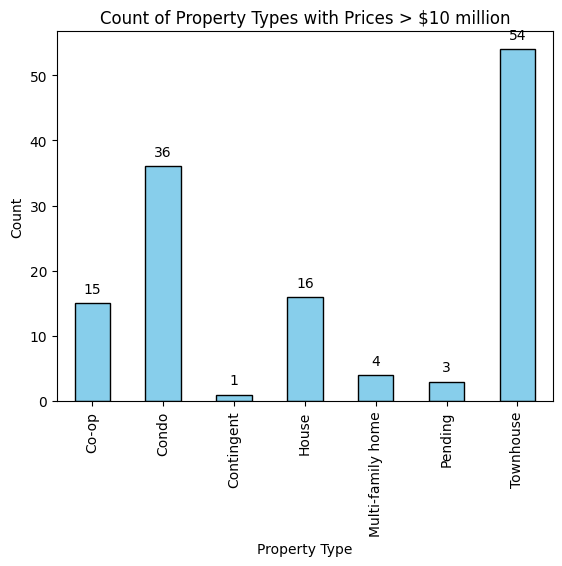

In [ ]:
df_high_price = df1[(df1['PRICE'] > 10000000) & (df1['Locality']=='Manhattan')].groupby('TYPE')['PRICE'].count()

# Create a bar plot
ax = df_high_price.plot(kind='bar', edgecolor='black', color='skyblue')

# Add data labels outside the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.title('Count of Property Types in Manhattan with Prices > $10 million')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.show()

We examined potential buyers' preferences based on property types in Manhattan real estate market in the $10 million price bracket. With 54 townhouses, 36 condominiums, and 16 houses listed in this unique price range, our data showed a varied real estate market.

This comprehensive analysis provides useful information for brokers and potential buyers alike, as well as illuminating the variety of options accessible to purchasers.

Brokers can use this information to better understand consumer needs, customize their products, and give customers more individualized and knowledgeable service.


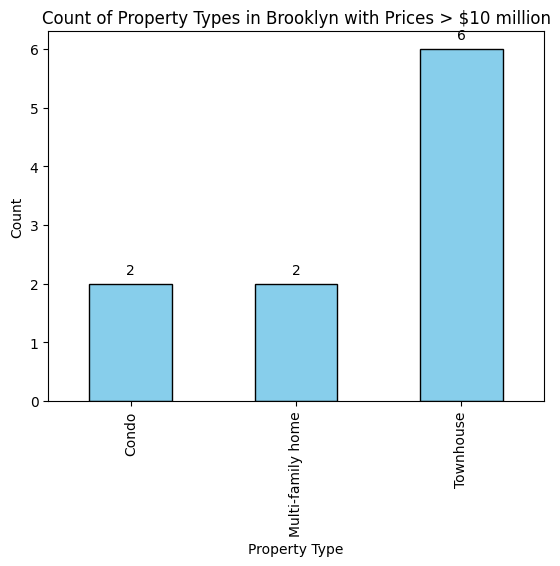

In [ ]:
df_high_price = df1[(df1['PRICE'] > 10000000) & (df1['Locality']=='Brooklyn')].groupby('TYPE')['PRICE'].count()

# Create a bar plot
ax = df_high_price.plot(kind='bar', edgecolor='black', color='skyblue')

# Add data labels outside the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.title('Count of Property Types in Brooklyn with Prices > $10 million')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.show()

This suggests that there are only three types of properties - Townhouses, multi-family home and Condos in Brooklyn within the price range of more than around $100 millions.


---



2. Price between 1 million & 10 million dollars

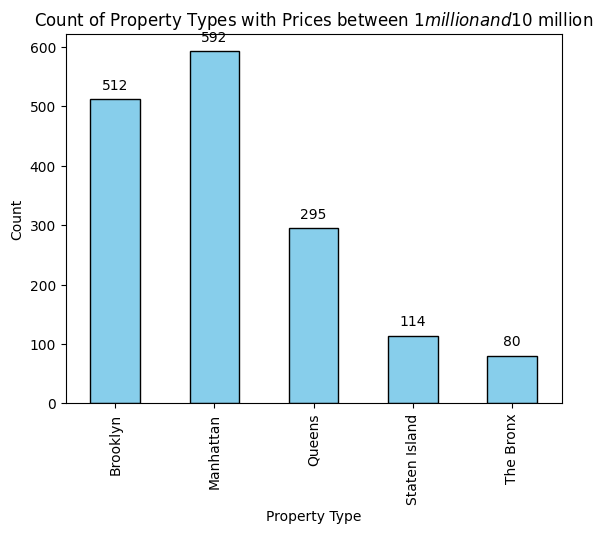

In [ ]:

price_between_1_and_10_million = df1[(df1['PRICE'] > 1000000) & (df1['PRICE'] < 10000000)].groupby('Locality')['PRICE'].count()
ax = price_between_1_and_10_million.plot(kind='bar', edgecolor='black', color='skyblue')

# Add data labels outside the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.title('Count of Property Types with Prices between $1 million and $10 million')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.show()

When looking at properties priced between one million and ten million dollars, Manhattan is the most sought-after area with the greatest number of properties in this price category. Brooklyn and Queens follow suit.
We will look for particular kinds of real estate in each of these famous places. The purpose of this strategic analysis is to provide useful information for potential purchasers and real estate industry players by revealing the distinct preferences and market dynamics that define the high-demand neighborhoods in Manhattan, Brooklyn, and Queens.

In [ ]:
#distribution of properties in Manhattan between $1 million and $10 million
df1[(df1['PRICE'] > 1000000) & (df1['PRICE'] < 10000000) & (df1['Locality'] == 'Manhattan')].groupby('TYPE')['PRICE'].count()

TYPE
Co-op                220
Condo                239
Contingent             2
For sale               4
Foreclosure            2
House                 26
Land                   1
Multi-family home     15
Pending               15
Townhouse             68
Name: PRICE, dtype: int64

In Manhattan, Condos and co-op emerge as the most sought-after choices among the buyers. Co-op, short for cooperative, is a type of housing where residents collectively own the building through shares in a cooperative corporation.

Co-ops provide financial advantages over condos in big cities like New York as they are slightly cheaper than buying a condo. Living in a cooperative reduces the individual's responsibility for upkeep of the property, making it more like renting. Co-op ownership's rigorous application procedure helps residents get to know their neighbors better, which promotes a feeling of community and shared values.

In [ ]:
#distribution of properties in Brooklyn between $1 million and $10 million
df1[(df1['PRICE'] > 1000000) & (df1['PRICE'] < 10000000) & (df1['Locality'] == 'Brooklyn')].groupby('TYPE')['PRICE'].count()

TYPE
Co-op                 11
Coming Soon            1
Condo                 76
Contingent             3
For sale               4
House                117
Land                   6
Multi-family home    180
Pending               36
Townhouse             78
Name: PRICE, dtype: int64

Our analysis shows a varied housing situation in the thriving borough of Brooklyn, with 180 multi-family homes and 117 single-family homes. Brooklyn's strategic location near Manhattan and its potential for improved quality of life make it an attractive residential destination. With its vast design, Brooklyn contrasts with the busy Manhattan skyline by providing plenty of green space and a more scattered atmosphere.

In [ ]:
#distribution of properties in Queens between $1 million and $10 million
df1[(df1['PRICE'] > 1000000) & (df1['PRICE'] < 10000000) & (df1['Locality'] == 'Queens')].groupby('TYPE')['PRICE'].count()

TYPE
Co-op                  6
Condo                 17
House                 97
Land                   4
Mobile house           1
Multi-family home    141
Pending               19
Townhouse             10
Name: PRICE, dtype: int64

In our data, we have seen a significant number of houses (97) and multi-family residences (141) in Queens, a borough that is well-known for its appeal in the New York real estate market. Queens is a place that is in high demand due to its relative affordability when compared to Manhattan and Brooklyn. Queens is an attractive option for anyone looking for both limited spending and a great quality of life because, in addition to its economic benefit, it has cheaper food and electricity prices. Of the several housing alternatives available in Queens, homes may be preferred due to their inherent value, offering occupants roomy living quarters, private outdoor areas, and a feeling of ownership that corresponds with the need for a permanent and nice home.


---



3. price less than $1 million

*We* are only looking at three boroughs - Manhattan, Brooklyn and Queens because of the highest number or properties in these boroughs as can be seen in the above charts.

In [ ]:
df1[(df1['PRICE'] < 1000000) & (df1['Locality']=='Manhattan')].groupby('TYPE')['PRICE'].count()

TYPE
Co-op                333
Condo                102
Contingent             9
For sale               7
House                  8
Multi-family home      2
Pending               27
Townhouse              1
Name: PRICE, dtype: int64

In [ ]:
df1[(df1['PRICE'] < 1000000) & (df1['Locality']=='Brooklyn')].groupby('TYPE')['PRICE'].count()

TYPE
Co-op                216
Coming Soon            1
Condo                137
Contingent             8
For sale               1
Foreclosure            1
House                138
Land                   9
Multi-family home     77
Pending               35
Townhouse             14
Name: PRICE, dtype: int64

In [ ]:
df1[(df1['PRICE'] < 1000000) & (df1['Locality']=='Queens')].groupby('TYPE')['PRICE'].count()

TYPE
Co-op                412
Condo                142
Foreclosure            2
House                191
Land                   8
Multi-family home     63
Pending               50
Townhouse             14
Name: PRICE, dtype: int64

We observe a notable demand for co-op properties in the three mentioned boroughs when the price falls below $1 million. This trend suggests a particular preference for cooperative housing options within this price range across these boroughs.


---




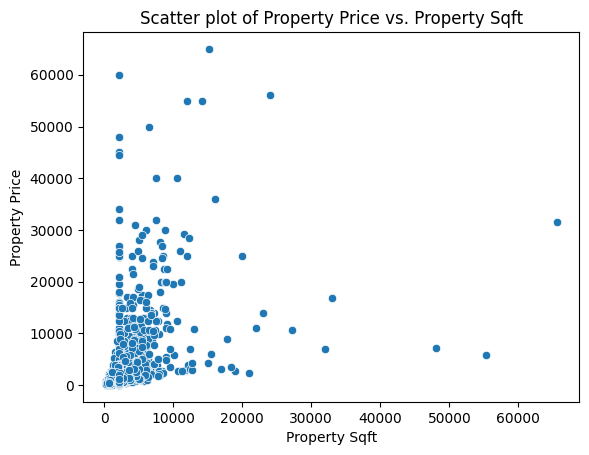

In [ ]:
#analysing the relationhsip between sqft and price
sns.scatterplot(x='PROPERTYSQFT',y= 'PRICE',data=df1)
plt.title('Scatter plot of Property Price vs. Property Sqft')
plt.xlabel('Property Sqft')
plt.ylabel('Property Price')
plt.show()

The data is gathered abour 10000 square feet. To enhance our understanding, we focus on properties with square footage less than 20000.


In [ ]:
df1[df1['PROPERTYSQFT']>20000][['TYPE','Locality','PROPERTYSQFT','PRICE']]

,TYPE,Locality,PROPERTYSQFT,PRICE
7,House,Staten Island,33000,16800000
141,House,Manhattan,24000,56000000
823,Multi-family home,The Bronx,48000,7200000
1143,Multi-family home,Brooklyn,22035,11000000
2054,Multi-family home,The Bronx,21000,2300000
2146,Multi-family home,Queens,55300,5827000
2653,Multi-family home,Staten Island,27152,10700000
2932,House,Manhattan,23027,14000000
3130,Multi-family home,The Bronx,32000,6950000
4623,Multi-family home,Brooklyn,65535,31500000


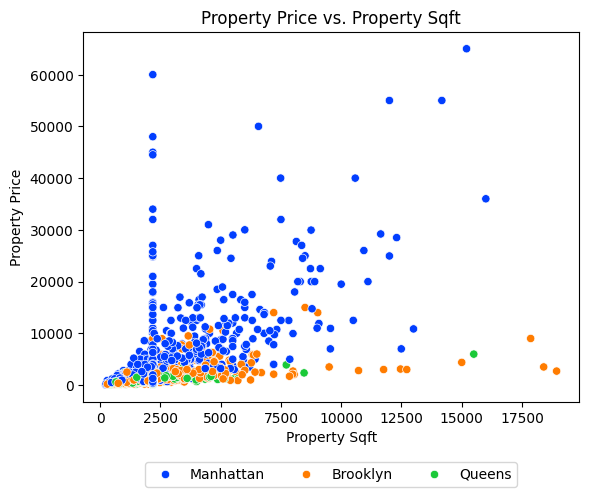

In [ ]:
#analysing the relationship between property sqft and price in Manhattan, Brooklyn and Queens
property_filter = df1[(df1['PROPERTYSQFT'] < 20000) & (df1['Locality'].isin(['Manhattan','Brooklyn','Queens']))]
sns.scatterplot(x='PROPERTYSQFT', y='PRICE', data=property_filter, hue='Locality', palette='bright')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=3)
plt.title('Property Price vs. Property Sqft (less than 20000 sqft)')
plt.xlabel('Property Sqft')
plt.ylabel('Property Price')
plt.show()


Our data shows a positive correlation between square footage and price. Interestingly, Manhattan properties have seen a more noticeable price spike specially at 2500 square footage.

In Brooklyn and Queens, the price tends to remain below $20000 even as the property square footage approaches 17,500.

This is indicative of a more affordable housing market in these boroughs, where the price increase per square footage is  not as pronounced as in Manhattan.



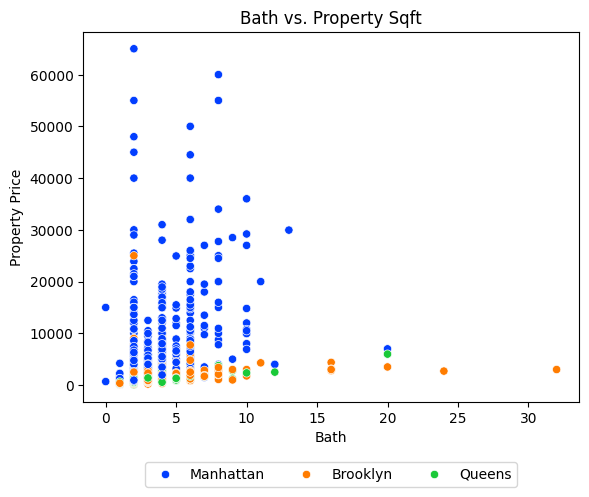

In [ ]:
#looking for impact of bathrooms on price
sns.scatterplot(x='BATH', y='PRICE', data=property_filter, hue='Locality', palette='bright')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=3)
plt.title('Bath vs. Property Price (between $10000 to $100 million)')
plt.xlabel('Bath')
plt.ylabel('Property Price ()')
plt.show()

The analysis highlights that the majority of properties in our dataset feature between 1 to 10 bathrooms. Notably, there are a few properties with an exceptionally high number of bathrooms, ranging from 20 to 30.

Despite these variations, the overlapping price ranges across different bathroom counts indicate that the number of bathrooms is not a decisive factor in determining the price for the majority of properties.

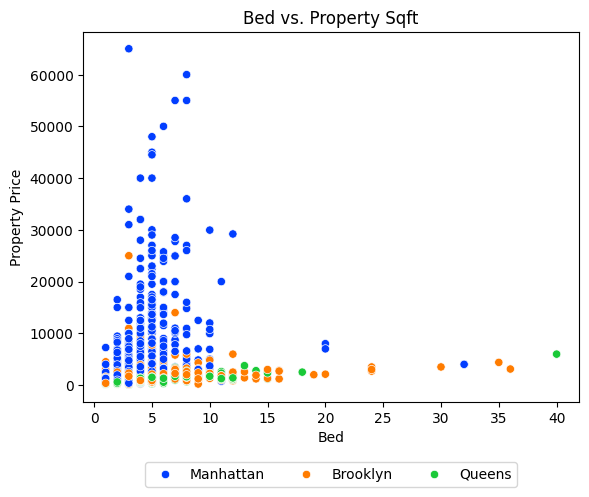

In [ ]:
sns.scatterplot(x='BEDS', y='PRICE', data=property_filter, hue='Locality', palette='bright')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=3)
plt.title('Bed vs. Property Price (between $10000 and $100 million)')
plt.xlabel('Bed')
plt.ylabel('Property Price')
plt.show()

The analysis reveals that a significant portion of properties in New York tends to have around 10 bedrooms. Interestingly, there are also properties with an unusually high number of bedrooms, approximately 35.

However, given the overlapping price ranges across various bedroom counts, it becomes evident that the number of bedrooms is not a decisive factor in determining the property prices.

